# Proyecto de Serie Temporal Alternativa ARIMA

In [1]:
# Your code here
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf


### Paso 1: Carga del conjunto de datos

In [6]:
# URL del archivo CSV
url = 'https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv'

# Leer el archivo CSV desde la URL
data_sales = pd.read_csv(url)

# Ruta de destino
ruta_destino = '/workspaces/Proyecto-Serie-Temporal-Alternativa/data/raw/sales.csv'

# Crear el directorio si no existe
os.makedirs(os.path.dirname(ruta_destino), exist_ok=True)

# Guardar el DataFrame en la ruta especificada con una copia de la data original
data_sales.to_csv(ruta_destino, index=False)

print(f'Archivo guardado en: {ruta_destino}')

Archivo guardado en: /workspaces/Proyecto-Serie-Temporal-Alternativa/data/raw/sales.csv


In [7]:
data_sales.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [8]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [9]:
# Transformamos a objeto Datetime
data_sales['fecha'] = pd.to_datetime(data_sales['date'], format='%Y-%m-%d %H:%M:%S.%f').dt.date
data_sales['fecha']=pd.to_datetime(data_sales['fecha'])
data_sales.head()

,date,sales,fecha
0,2022-09-03 17:10:08.079328,55.292157,2022-09-03
1,2022-09-04 17:10:08.079328,53.803211,2022-09-04
2,2022-09-05 17:10:08.079328,58.141693,2022-09-05
3,2022-09-06 17:10:08.079328,64.530899,2022-09-06
4,2022-09-07 17:10:08.079328,66.013633,2022-09-07


In [10]:

col=['fecha','sales']
total_sales=data_sales[col]
total_sales=total_sales.set_index('fecha')
total_sales.info()
total_sales.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-09-03 to 2023-09-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


,sales
fecha,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633


### Paso 2: Construye y analiza la serie temporal

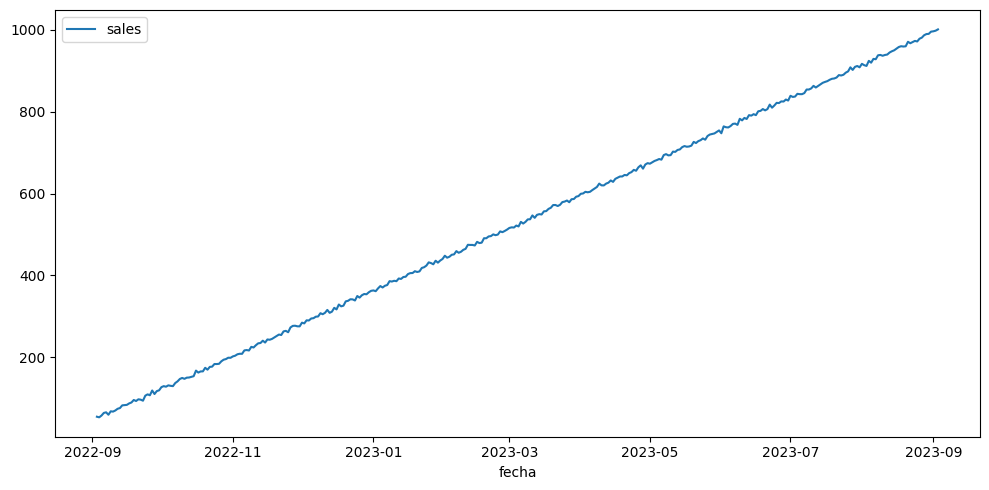

In [11]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_sales)

plt.tight_layout()

plt.show()

Descomposición de la serie

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

periodo=7
decomposition = seasonal_decompose(total_sales,period=periodo)
decomposition

- Análisis de Tendencia

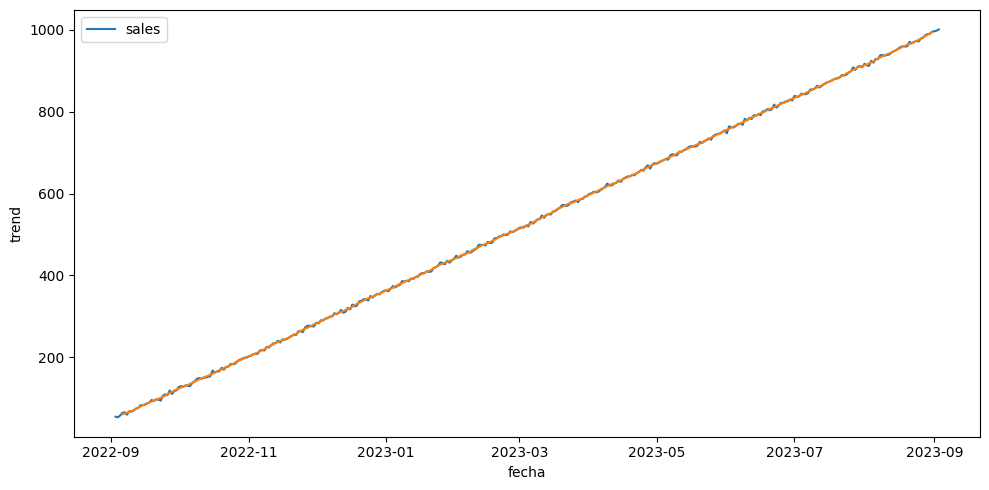

In [14]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_sales)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

Evidenciamos una tendencia ascendente

* Análisis de la estacionalidad

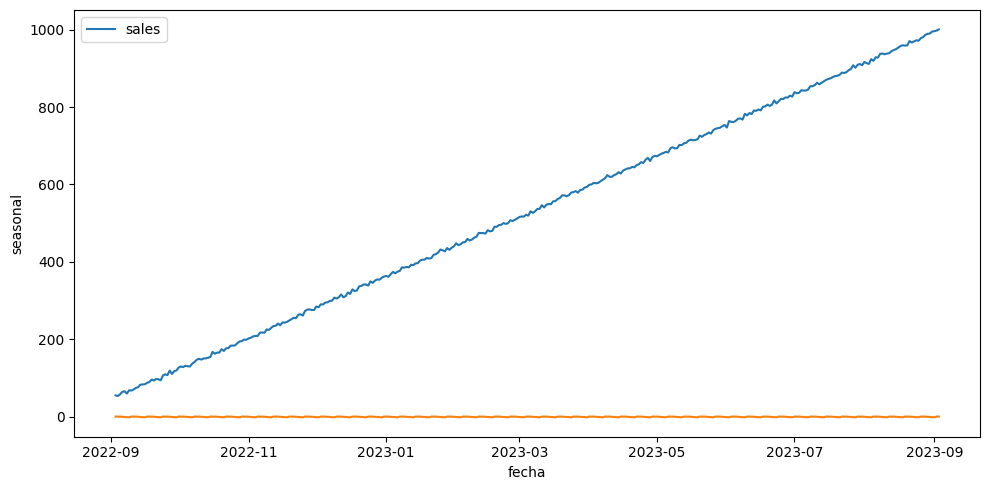

In [15]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_sales)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

No se evidencia estacionalidad de la serie, para evaluar la estacionalidad de la serie temporal de mejor manera aplicamos Prueba de Dickey-Fuller

In [16]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados test Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_sales)

Resultados test Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

Evidenciamos que el p-value es mayor a 0.05 por tanto determinamos que no es estacionaria.

* Análisis de la variabilidad

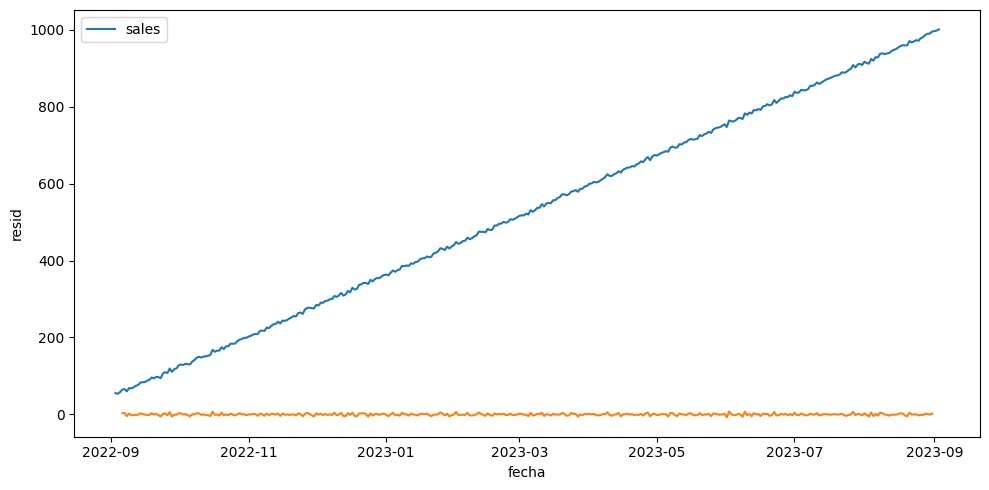

In [17]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_sales)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

Evidenciamos una baja variabilidad

* Análisis de autocorrelación

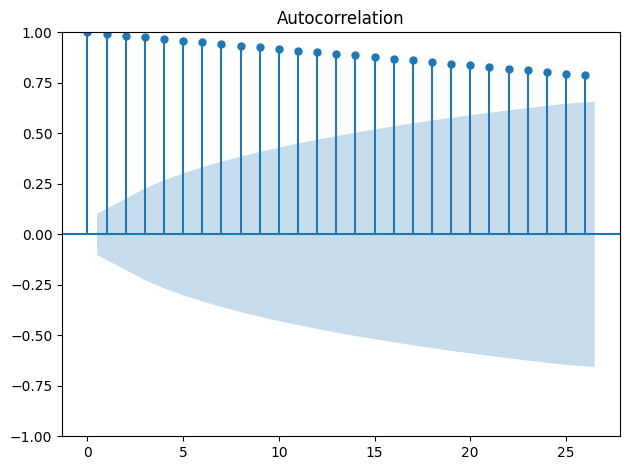

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(total_sales)

plt.tight_layout()

plt.show()

### Paso 3: Entrena un ARIMA

### Paso 4: Predice con el conjunto de test

### Paso 5: Guarda el modelo